# Import Dependencies and data

## Python Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import DBSCAN, KMeans
from sklearn.neural_network import MLPClassifier
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

## Read data

In [2]:
df = pd.read_csv('TV_Final.csv')

# Data understanding

## Info about data

In [3]:
df.head()

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4
2,realme,HD LED,32,13999,17999,Android,4.3
3,Mi,HD LED,32,14999,19999,Android,4.4
4,realme,HD LED,32,12999,21999,Android,4.3


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             912 non-null    object 
 1   Resolution        912 non-null    object 
 2   Size              912 non-null    int64  
 3   Selling Price     912 non-null    int64  
 4   Original Price    912 non-null    int64  
 5   Operating System  912 non-null    object 
 6   Rating            912 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 50.0+ KB


## Null values

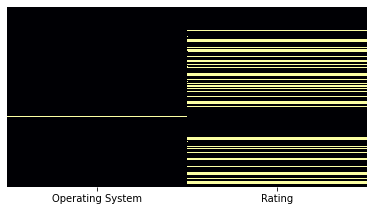

In [5]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 0.5, 0.5])
missings = pd.DataFrame(df.isnull().sum())
vars_with_missings = missings[missings > 1].dropna().index.tolist()
sns.heatmap(df[vars_with_missings].isnull(),
            cbar=False, yticklabels=False, cmap='inferno', ax=ax)
plt.show()

In [6]:
df['Operating System'] = df['Operating System'].fillna('Unknown')

<AxesSubplot:>

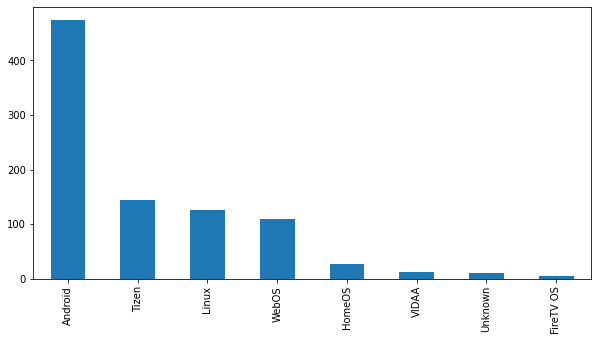

In [7]:
df['Operating System'].value_counts().plot(kind='bar')

In [8]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

In [9]:
df.isnull().sum()

Brand               0
Resolution          0
Size                0
Selling Price       0
Original Price      0
Operating System    0
Rating              0
dtype: int64

## Clean data

In [10]:
clean_df = df.rename(columns={'Size ': 'Size'})

In [11]:
v = clean_df.Brand.value_counts()
v.gt(10)

SAMSUNG              True
LG                   True
SONY                 True
TCL                  True
Panasonic            True
Micromax             True
Vu                   True
Lloyd                True
iFFALCON by TCL      True
Mi                   True
Sansui               True
Thomson              True
Haier                True
PHILIPS              True
MOTOROLA             True
KODAK                True
Blaupunkt            True
TOSHIBA              True
IMPEX                True
Candes               True
Onida                True
Croma                True
Nokia                True
T-Series             True
Power Guard          True
Hisense             False
CloudWalker         False
OnePlus             False
Coocaa              False
RGL                 False
Acer                False
G-TEN               False
Onix                False
MarQ by Flipkart    False
Sharp               False
AISEN               False
realme              False
Intex               False
Adsun       

In [12]:
v = clean_df.Brand.value_counts()
clean_df = clean_df[clean_df.Brand.isin(v.index[v.gt(10)])]

In [13]:
v = clean_df.Size.value_counts()
v.gt(5)

55     True
43     True
32     True
65     True
50     True
49     True
40     True
24     True
75     True
42     True
39     True
48     True
60    False
22    False
46    False
58    False
47    False
20    False
31    False
28    False
52    False
70    False
85    False
Name: Size, dtype: bool

In [14]:
v = clean_df.Size.value_counts()
clean_df = clean_df[clean_df.Size.isin(v.index[v.gt(5)])]

## Data analys

In [15]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 694 entries, 0 to 911
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             694 non-null    object 
 1   Resolution        694 non-null    object 
 2   Size              694 non-null    int64  
 3   Selling Price     694 non-null    int64  
 4   Original Price    694 non-null    int64  
 5   Operating System  694 non-null    object 
 6   Rating            694 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 43.4+ KB


In [16]:
clean_df.describe()

,Size,Selling Price,Original Price,Rating
count,694.000000,694.000000,694.000000,694.000000
mean,47.070605,64499.162824,90244.139769,4.265742
std,11.765846,66339.142388,88652.346340,0.308136
min,24.000000,5792.000000,10499.000000,2.000000
25%,40.000000,24013.500000,31990.000000,4.200000
50%,49.000000,41174.000000,58900.000000,4.234104
75%,55.000000,76798.500000,110967.500000,4.400000
max,75.000000,470900.000000,549990.000000,5.000000


In [17]:
clean_df['Brand'].value_counts()

SAMSUNG            137
LG                 113
SONY                61
TCL                 44
Panasonic           30
Micromax            22
Vu                  22
Lloyd               20
iFFALCON by TCL     19
Mi                  19
Sansui              18
Thomson             18
Haier               18
MOTOROLA            15
Blaupunkt           15
KODAK               15
PHILIPS             14
IMPEX               13
TOSHIBA             13
Candes              12
Croma               12
T-Series            11
Power Guard         11
Onida               11
Nokia               11
Name: Brand, dtype: int64

In [18]:
len(clean_df['Brand'].unique())

25

In [19]:
clean_df['Resolution'].value_counts()

Ultra HD LED     331
Full HD LED      159
HD LED           150
QLED Ultra HD     52
HD Plasma          2
Name: Resolution, dtype: int64

<AxesSubplot:>

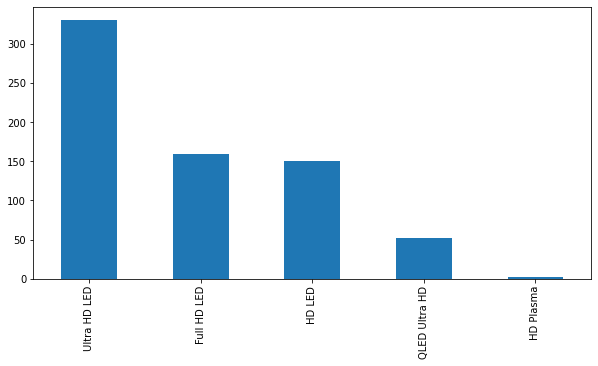

In [20]:
clean_df['Resolution'].value_counts().plot(kind='bar')

In [21]:
clean_df['Size'].value_counts()

55    139
43    135
32    124
65     91
50     57
49     54
40     34
24     27
75     13
42      7
39      7
48      6
Name: Size, dtype: int64

In [22]:
clean_df.head()

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4
3,Mi,HD LED,32,14999,19999,Android,4.4
7,TCL,Ultra HD LED,65,57999,119990,Android,4.2
8,Mi,Full HD LED,40,21999,29999,Android,4.3


In [23]:
clean_df.corr()

,Size,Selling Price,Original Price,Rating
Size,1.000000,0.675240,0.742027,0.130368
Selling Price,0.675240,1.000000,0.938235,0.062093
Original Price,0.742027,0.938235,1.000000,0.067206
Rating,0.130368,0.062093,0.067206,1.000000


array([<AxesSubplot:xlabel='Size'>], dtype=object)

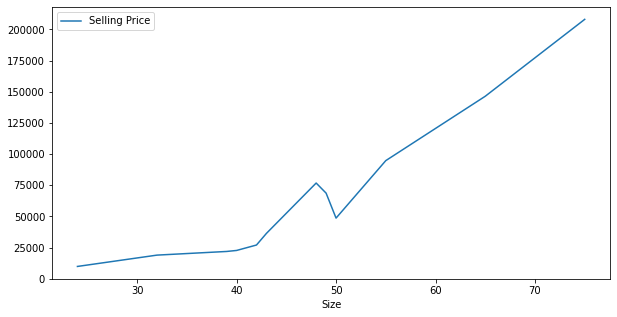

In [24]:
df_siz_price = pd.pivot_table(clean_df,
                          values='Selling Price',
                          index=['Size'],
                          aggfunc=np.mean)
df_siz_price.plot(subplots=True, sharex=False)

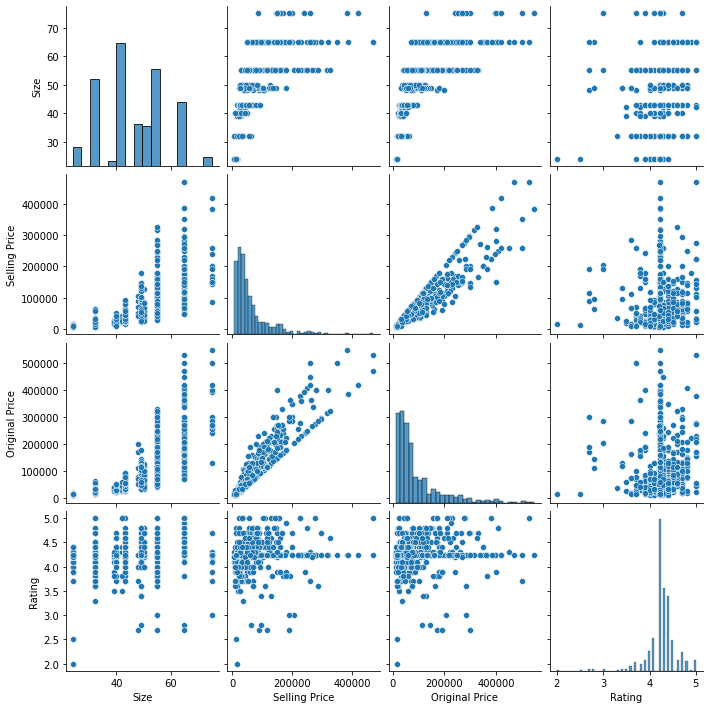

In [25]:
 sns.pairplot(clean_df)

## Add new features

In [26]:
df_new = clean_df.copy()

In [27]:
df_new['discound']=df_new['Original Price']-df_new['Selling Price']

In [28]:
df_new['discound'].describe()

count       694.000000
mean      25744.976945
std       34991.044031
min           0.000000
25%        5000.000000
50%       13991.000000
75%       29991.000000
max      250000.000000
Name: discound, dtype: float64

<AxesSubplot:>

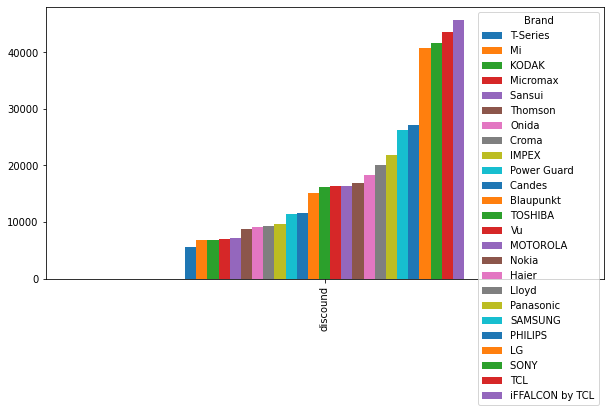

In [29]:
pd.pivot_table(df_new, values='discound', columns=['Brand'], aggfunc=np.mean).sort_values(['discound'],axis=1).plot(kind='bar')

In [30]:
pd.pivot_table(df_new, values='discound', index=['Brand'], aggfunc=np.mean).sort_values(['discound'],axis=0)

,discound
Brand,
T-Series,5538.090909
Mi,6790.894737
KODAK,6864.866667
Micromax,7062.772727
Sansui,7179.055556
Thomson,8721.722222
Onida,9183.909091
Croma,9301.000000
IMPEX,9563.615385


In [31]:
# Get one hot encoding of columns Brand
one_hot = pd.get_dummies(df_new['Brand'])
# Drop column Brand as it is now encoded
df_new = df_new.drop('Brand',axis = 1)
# Join the encoded df
df_new = df_new.join(one_hot)
df_new

,Resolution,Size,Selling Price,Original Price,Operating System,Rating,discound,Blaupunkt,Candes,Croma,...,Power Guard,SAMSUNG,SONY,Sansui,T-Series,TCL,TOSHIBA,Thomson,Vu,iFFALCON by TCL
0,Ultra HD LED,55,37999,54990,VIDAA,4.3,16991,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,QLED Ultra HD,55,52999,129990,Android,4.4,76991,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,HD LED,32,14999,19999,Android,4.4,5000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Ultra HD LED,65,57999,119990,Android,4.2,61991,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,Full HD LED,40,21999,29999,Android,4.3,8000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,Full HD LED,43,44999,57900,Linux,4.4,12901,0,0,0,...,0,0,1,0,0,0,0,0,0,0
908,Full HD LED,40,41499,51900,Linux,4.6,10401,0,0,0,...,0,0,1,0,0,0,0,0,0,0
909,Ultra HD LED,65,149990,184990,Linux,4.3,35000,0,0,0,...,0,0,1,0,0,0,0,0,0,0
910,HD LED,32,32900,32900,Linux,4.4,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [32]:
# Get one hot encoding of columns Operating System
one_hot = pd.get_dummies(df_new['Operating System'])
# Drop column Operating System as it is now encoded
df_new = df_new.drop('Operating System',axis = 1)
# Join the encoded df
df_new = df_new.join(one_hot)
df_new

,Resolution,Size,Selling Price,Original Price,Rating,discound,Blaupunkt,Candes,Croma,Haier,...,Thomson,Vu,iFFALCON by TCL,Android,FireTV OS,HomeOS,Linux,Tizen,VIDAA,WebOS
0,Ultra HD LED,55,37999,54990,4.3,16991,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,QLED Ultra HD,55,52999,129990,4.4,76991,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,HD LED,32,14999,19999,4.4,5000,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,Ultra HD LED,65,57999,119990,4.2,61991,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,Full HD LED,40,21999,29999,4.3,8000,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,Full HD LED,43,44999,57900,4.4,12901,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
908,Full HD LED,40,41499,51900,4.6,10401,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
909,Ultra HD LED,65,149990,184990,4.3,35000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
910,HD LED,32,32900,32900,4.4,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [33]:
# Get one hot encoding of columns Resolution
one_hot = pd.get_dummies(df_new['Resolution'])
# Drop column Resolution as it is now encoded
df_new = df_new.drop('Resolution',axis = 1)
# Join the encoded df
df_new = df_new.join(one_hot)
df_new

,Size,Selling Price,Original Price,Rating,discound,Blaupunkt,Candes,Croma,Haier,IMPEX,...,HomeOS,Linux,Tizen,VIDAA,WebOS,Full HD LED,HD LED,HD Plasma,QLED Ultra HD,Ultra HD LED
0,55,37999,54990,4.3,16991,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,55,52999,129990,4.4,76991,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,32,14999,19999,4.4,5000,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,65,57999,119990,4.2,61991,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,40,21999,29999,4.3,8000,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,43,44999,57900,4.4,12901,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
908,40,41499,51900,4.6,10401,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
909,65,149990,184990,4.3,35000,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
910,32,32900,32900,4.4,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


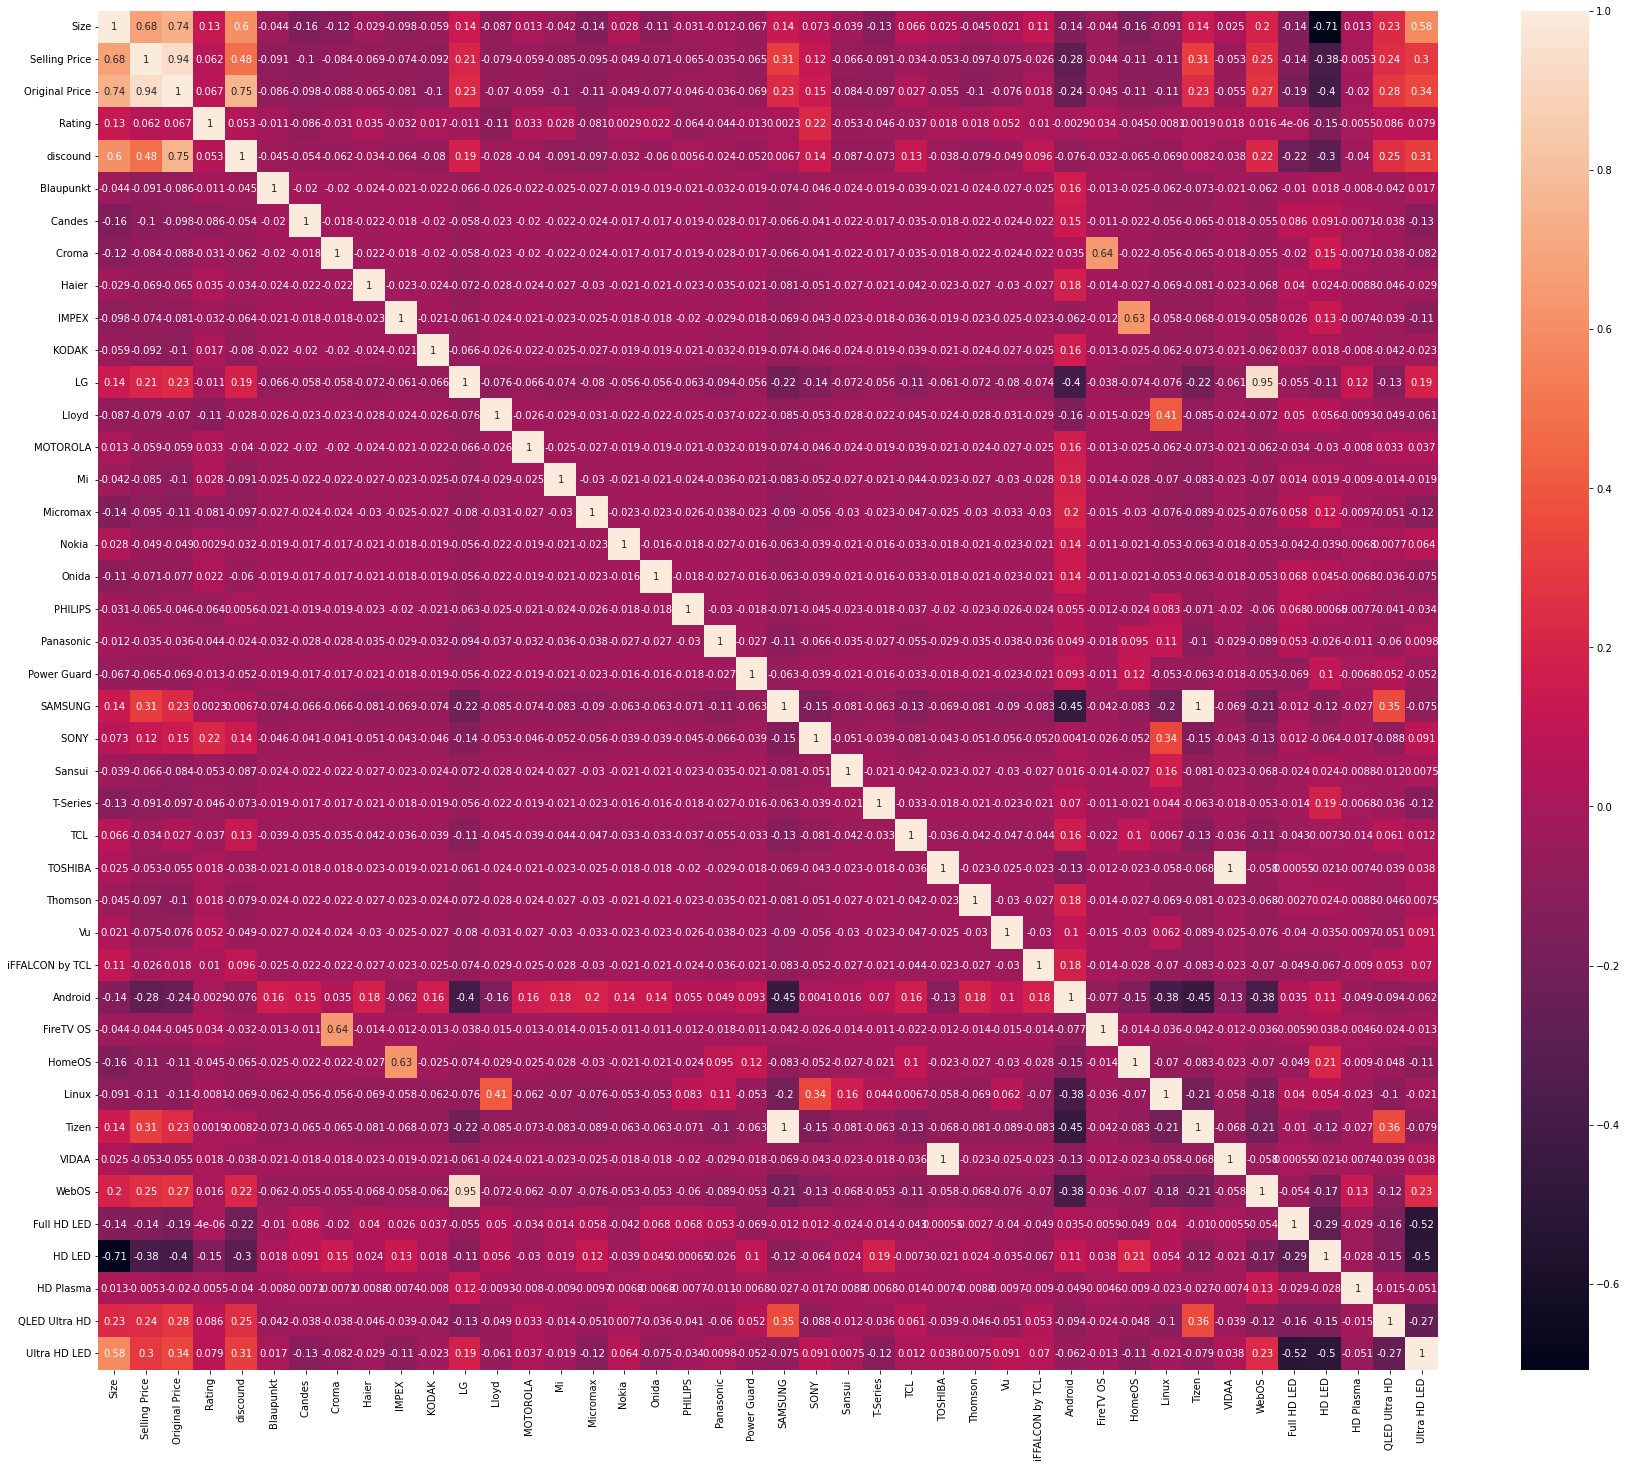

In [34]:
corrmat = df_new.corr()
f, ax = plt.subplots(figsize=(30, 25))
sns.heatmap(corrmat, annot=True)
plt.show()

# Modeling

## Price predict

### linear regression

In [35]:

X = df_new.drop(['Selling Price', 'Original Price', 'discound'], axis = 1)
y = df_new['Original Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [36]:

mr = LinearRegression().fit(X_train, y_train)

# Getting parameters
mr.coef_, mr.intercept_

(array([  5881.07879961, -12679.29373792, -16921.02184702,  19520.64717506,
          5920.05072775, -10713.80952173,  -9228.00755002, -17245.2030777 ,
         27856.69128457,  23667.27557828, -25092.09773062, -18907.54932398,
          2193.64659952, -35226.98053344,  20431.92332863,   8905.10397729,
         15671.06022327,  -9522.68672373,  38483.36175828,  51698.22647021,
         -3987.09037183,  -2452.39236921,   5955.82998585, -15024.9170487 ,
        -20706.45185641, -21894.20320731, -13381.40594701,   3566.41361798,
          4993.97229555,   7392.53023116, -13040.11372039,  -4966.95357846,
        -15024.9170487 ,  17079.06820284,  -1936.85342346,  42722.64204339,
        -67992.63258111,  34793.89934168,  -7587.05538051]),
 -159321.61796748833)

In [37]:
# Coefficient of determination R^2
mr.score(X_train, y_train).round(3), mr.score(X_test, y_test).round(3)

(0.704, 0.619)

In [38]:
# Predicting the Test set results
y_pred = mr.predict(X_test)

print(mean_squared_error(y_train, mr.predict(X_train), squared=False).round(2))
mean_squared_error(y_test, y_pred, squared=False).round(2)

43160.92


71260.08

### RandomForestRegressor

In [41]:
rf = RandomForestRegressor(n_estimators = 50, random_state = 5).fit(X_train, y_train)

# Predicting the Test set results
rf_y_pred = rf.predict(X_test)

In [42]:
print(mean_squared_error(y_train, rf.predict(X_train), squared=False).round(2))
mean_squared_error(y_test, rf_y_pred, squared=False).round(2)

25490.25


64218.89

Данная модель справилась лучше, чем линейная регрессия 


## Price predict but use less features

### Prepare data

In [43]:
df_new2 = clean_df.copy()
# Get one hot encoding of columns Resolution
one_hot = pd.get_dummies(df_new2['Resolution'])
# Drop column Resolution as it is now encoded
df_new2 = df_new2.drop('Resolution',axis = 1)
# Join the encoded df
df_new2 = df_new2.join(one_hot)
df_new2

,Brand,Size,Selling Price,Original Price,Operating System,Rating,Full HD LED,HD LED,HD Plasma,QLED Ultra HD,Ultra HD LED
0,TOSHIBA,55,37999,54990,VIDAA,4.3,0,0,0,0,1
1,TCL,55,52999,129990,Android,4.4,0,0,0,1,0
3,Mi,32,14999,19999,Android,4.4,0,1,0,0,0
7,TCL,65,57999,119990,Android,4.2,0,0,0,0,1
8,Mi,40,21999,29999,Android,4.3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
907,SONY,43,44999,57900,Linux,4.4,1,0,0,0,0
908,SONY,40,41499,51900,Linux,4.6,1,0,0,0,0
909,SONY,65,149990,184990,Linux,4.3,0,0,0,0,1
910,SONY,32,32900,32900,Linux,4.4,0,1,0,0,0


In [44]:
X = df_new2.drop(['Selling Price', 'Original Price', 'Brand', 'Operating System'], axis = 1)
y = df_new2['Original Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

### LinearRegression

In [45]:
mr = LinearRegression().fit(X_train, y_train)

# Getting parameters
mr.coef_, mr.intercept_

(array([  6072.62211931,  -5314.72736414,  -7330.58723776,  33853.06008687,
        -45098.52951107,  32444.53476172, -13868.47809976]),
 -178039.46781720975)

In [46]:
# Coefficient of determination R^2
mr.score(X_train, y_train).round(3), mr.score(X_test, y_test).round(3)

(0.615, 0.516)

In [47]:
# Predicting the Test set results
y_pred = mr.predict(X_test)

print(mean_squared_error(y_train, mr.predict(X_train), squared=False).round(2))
mean_squared_error(y_test, y_pred, squared=False).round(2)

49232.31


80332.6

При меньшем количестве данных, разница ошибок стала меньше, но сама модель хуже

### RandomForestRegressor

In [59]:
rf = RandomForestRegressor(n_estimators = 50, random_state = 5).fit(X_train, y_train)

# Predicting the Test set results
rf_y_pred = rf.predict(X_test)

In [60]:
print(mean_squared_error(y_train, rf.predict(X_train), squared=False).round(2))
mean_squared_error(y_test, rf_y_pred, squared=False).round(2)

38288.86


74887.79

данная модель справилась хуже, чем предыдущая

## Breand clustering

### Prepare data

In [49]:
df_to_brand = clean_df.copy()

In [50]:
# Get one hot encoding of columns Operating System
one_hot = pd.get_dummies(df_to_brand['Operating System'])
# Drop column B as it is now encoded
df_to_brand = df_to_brand.drop('Operating System',axis = 1)
# Join the encoded df
df_to_brand = df_to_brand.join(one_hot)
df_to_brand

,Brand,Resolution,Size,Selling Price,Original Price,Rating,Android,FireTV OS,HomeOS,Linux,Tizen,VIDAA,WebOS
0,TOSHIBA,Ultra HD LED,55,37999,54990,4.3,0,0,0,0,0,1,0
1,TCL,QLED Ultra HD,55,52999,129990,4.4,1,0,0,0,0,0,0
3,Mi,HD LED,32,14999,19999,4.4,1,0,0,0,0,0,0
7,TCL,Ultra HD LED,65,57999,119990,4.2,1,0,0,0,0,0,0
8,Mi,Full HD LED,40,21999,29999,4.3,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,SONY,Full HD LED,43,44999,57900,4.4,0,0,0,1,0,0,0
908,SONY,Full HD LED,40,41499,51900,4.6,0,0,0,1,0,0,0
909,SONY,Ultra HD LED,65,149990,184990,4.3,0,0,0,1,0,0,0
910,SONY,HD LED,32,32900,32900,4.4,0,0,0,1,0,0,0


In [51]:
# Get one hot encoding of columns Resolution
one_hot = pd.get_dummies(df_to_brand['Resolution'])
# Drop column B as it is now encoded
df_to_brand = df_to_brand.drop('Resolution',axis = 1)
# Join the encoded df
df_to_brand = df_to_brand.join(one_hot)
df_to_brand

,Brand,Size,Selling Price,Original Price,Rating,Android,FireTV OS,HomeOS,Linux,Tizen,VIDAA,WebOS,Full HD LED,HD LED,HD Plasma,QLED Ultra HD,Ultra HD LED
0,TOSHIBA,55,37999,54990,4.3,0,0,0,0,0,1,0,0,0,0,0,1
1,TCL,55,52999,129990,4.4,1,0,0,0,0,0,0,0,0,0,1,0
3,Mi,32,14999,19999,4.4,1,0,0,0,0,0,0,0,1,0,0,0
7,TCL,65,57999,119990,4.2,1,0,0,0,0,0,0,0,0,0,0,1
8,Mi,40,21999,29999,4.3,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,SONY,43,44999,57900,4.4,0,0,0,1,0,0,0,1,0,0,0,0
908,SONY,40,41499,51900,4.6,0,0,0,1,0,0,0,1,0,0,0,0
909,SONY,65,149990,184990,4.3,0,0,0,1,0,0,0,0,0,0,0,1
910,SONY,32,32900,32900,4.4,0,0,0,1,0,0,0,0,1,0,0,0


In [52]:
df_brand = pd.pivot_table(df_to_brand,
                          index=['Brand'],
                          aggfunc=np.mean)
df_brand

,Android,FireTV OS,Full HD LED,HD LED,HD Plasma,HomeOS,Linux,Original Price,QLED Ultra HD,Rating,Selling Price,Size,Tizen,Ultra HD LED,VIDAA,WebOS
Brand,,,,,,,,,,,,,,,,
Blaupunkt,1.000000,0.000000,0.200000,0.266667,0.000000,0.000000,0.000000,38832.933333,0.000000,4.242274,23712.333333,43.600000,0.000000,0.533333,0,0.000000
Candes,1.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,24923.333333,0.000000,4.066667,13415.666667,32.916667,0.000000,0.000000,0,0.000000
Croma,0.583333,0.416667,0.166667,0.666667,0.000000,0.000000,0.000000,31666.666667,0.000000,4.194894,22365.666667,36.000000,0.000000,0.166667,0,0.000000
Haier,1.000000,0.000000,0.333333,0.277778,0.000000,0.000000,0.000000,54976.722222,0.000000,4.331696,36616.222222,45.000000,0.000000,0.388889,0,0.000000
IMPEX,0.230769,0.000000,0.307692,0.615385,0.000000,0.769231,0.000000,38383.000000,0.000000,4.195287,28819.384615,38.769231,0.000000,0.076923,0,0.000000
KODAK,1.000000,0.000000,0.333333,0.266667,0.000000,0.000000,0.000000,30529.933333,0.000000,4.300000,23665.066667,42.400000,0.000000,0.400000,0,0.000000
LG,0.000000,0.000000,0.176991,0.115044,0.017699,0.000000,0.088496,136951.902655,0.000000,4.258330,96117.132743,50.805310,0.000000,0.690265,0,0.911504
Lloyd,0.000000,0.000000,0.350000,0.350000,0.000000,0.000000,1.000000,54078.200000,0.000000,4.066936,33954.250000,41.150000,0.000000,0.300000,0,0.000000
MOTOROLA,1.000000,0.000000,0.133333,0.133333,0.000000,0.000000,0.000000,54825.933333,0.133333,4.333333,38399.000000,48.066667,0.000000,0.600000,0,0.000000


### Normalazi data

In [53]:
df_n = (df_brand-df_brand.min())/(df_brand.max()-df_brand.min())
df_n

,Android,FireTV OS,Full HD LED,HD LED,HD Plasma,HomeOS,Linux,Original Price,QLED Ultra HD,Rating,Selling Price,Size,Tizen,Ultra HD LED,VIDAA,WebOS
Brand,,,,,,,,,,,,,,,,
Blaupunkt,1.000000,0.0,0.400000,0.279583,0.0,0.000000,0.000000,0.141075,0.000000,0.417819,0.111819,0.494378,0.0,0.733333,0.0,0.0
Candes,1.000000,0.0,1.000000,0.584375,0.0,0.000000,0.000000,0.019312,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
Croma,0.583333,1.0,0.333333,0.802083,0.0,0.000000,0.000000,0.078342,0.000000,0.305089,0.097194,0.142683,0.0,0.229167,0.0,0.0
Haier,1.000000,0.0,0.666667,0.294097,0.0,0.000000,0.000000,0.282396,0.000000,0.630579,0.251951,0.559164,0.0,0.534722,0.0,0.0
IMPEX,0.230769,0.0,0.615385,0.735096,0.0,1.000000,0.000000,0.137136,0.000000,0.306024,0.167280,0.270831,0.0,0.105769,0.0,0.0
KODAK,1.000000,0.0,0.666667,0.279583,0.0,0.000000,0.000000,0.068391,0.000000,0.555166,0.111305,0.438847,0.0,0.550000,0.0,0.0
LG,0.000000,0.0,0.353982,0.081527,1.0,0.000000,0.088496,1.000000,0.000000,0.456022,0.898113,0.827808,0.0,0.949115,0.0,1.0
Lloyd,0.000000,0.0,0.700000,0.388437,0.0,0.000000,1.000000,0.274531,0.000000,0.000642,0.223043,0.381003,0.0,0.412500,0.0,0.0
MOTOROLA,1.000000,0.0,0.266667,0.105417,0.0,0.000000,0.000000,0.281076,0.507407,0.634476,0.271312,0.701076,0.0,0.825000,0.0,0.0


### Clustering

#### Hierarchical Clustering

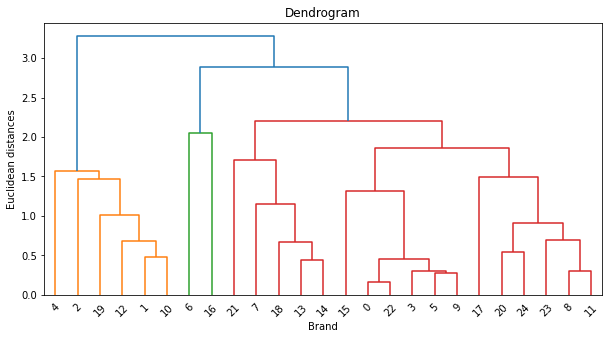

In [64]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df_n, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Brand')
plt.ylabel('Euclidean distances')
plt.show()

Мы наблюдаем 3-5 ярко выраженых кластера по брендам

In [76]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward').fit_predict(df_n)

In [77]:
hc

array([0, 3, 3, 0, 3, 0, 4, 1, 0, 0, 3, 0, 3, 1, 1, 0, 2, 0, 1, 3, 0, 1,
       0, 0, 0])

#### K-Means

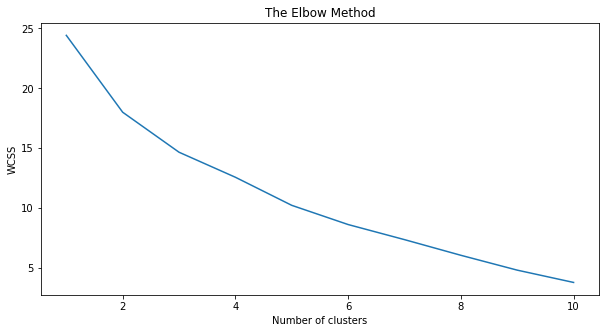

In [69]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df_n)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

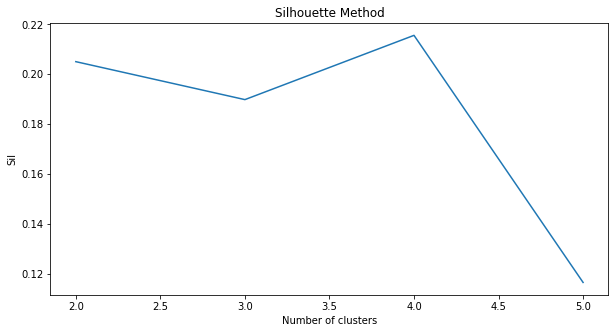

2:0.20504052633666472
3:0.18982042732660884
4:0.21558709719066918
5:0.11650711852635572


In [72]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 6):
  kmeans = KMeans(n_clusters = k).fit(df_n)  
  preds = kmeans.fit_predict(df_n)
  sil.append(silhouette_score(df_n, preds, metric = 'euclidean'))


plt.plot(range(2, 6), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

In [75]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0).fit_predict(df_n)
kms = KMeans(n_clusters = 5, random_state = 0).fit(df_n)
pd.DataFrame(kms.cluster_centers_, columns = df_n.columns).round(2)

,Android,FireTV OS,Full HD LED,HD LED,HD Plasma,HomeOS,Linux,Original Price,QLED Ultra HD,Rating,Selling Price,Size,Tizen,Ultra HD LED,VIDAA,WebOS
0,0.94,0.00,0.36,0.23,0.0,0.03,0.04,0.28,0.26,0.53,0.24,0.63,0.0,0.72,0.0,0.0
1,0.76,0.17,0.66,0.69,0.0,0.17,0.05,0.08,0.00,0.26,0.11,0.16,0.0,0.13,0.0,0.0
2,0.00,0.00,0.44,0.08,0.0,0.00,0.01,0.95,1.00,0.48,1.00,0.81,1.0,0.55,0.0,0.0
3,0.23,0.00,0.42,0.09,0.5,0.00,0.31,0.98,0.00,0.73,0.87,0.81,0.0,0.90,0.0,0.5
4,0.34,-0.00,0.60,0.23,-0.0,0.03,0.44,0.31,0.04,0.25,0.29,0.56,-0.0,0.62,0.2,-0.0


Самый большой ориджинал прайс и рейтинг у 3 кластера, самый большой размер у 2 и 3 кластера, у 0го кластера практически всегда система Андроид

#### Results matching

In [83]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,km).round(3)

0.902

Вывод: разными методами мы получили схожие кластеры



#### DBSCAN

In [78]:
def plot_2d(ar, label_list_cluster, label_list):
    plt.figure(figsize=(10, 7))
    plt.subplots_adjust(bottom=0.1)
    c = label_list_cluster
    plt.scatter(ar[:, 0], ar[:, 1], c=c, cmap='rainbow', label='True Position')

    for label, x, y in zip(label_list, ar[:, 0], ar[:, 1]):
        plt.annotate(
            label,
            xy=(x, y), xytext=(-3, 3),
            textcoords='offset points', ha='right', va='bottom')
    plt.show()

All features:

[ 0  1 -1  0 -1  0 -1 -1  2  0  1  2  0  3  3 -1 -1 -1 -1 -1 -1 -1  0 -1
 -1]


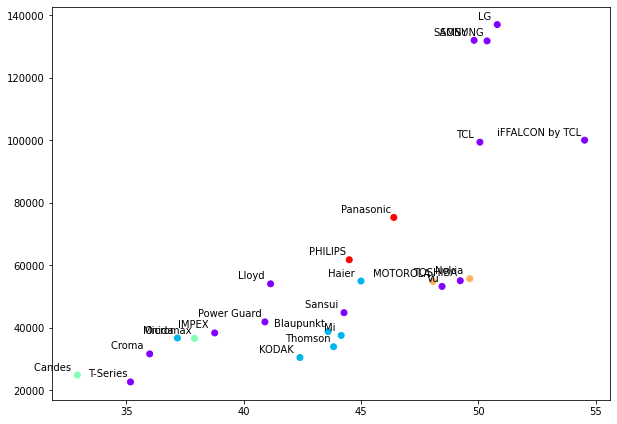

In [79]:
X = df_n.to_numpy()
clustering = DBSCAN(eps=0.5,min_samples=2).fit(X)
print(clustering.labels_)
plot_2d(df_brand[['Size', 'Original Price']].to_numpy(),clustering.labels_,df_brand.index)

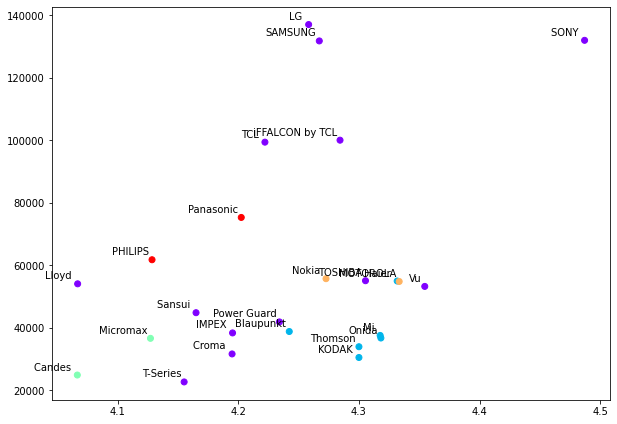

In [80]:
plot_2d(df_brand[['Rating', 'Original Price']].to_numpy(),clustering.labels_,df_brand.index)

Features: 'Size', 'Original Price'

[ 0 -1  1  0  1  0  2 -1  3  0  1  3  1  0 -1 -1  2  2  0  1 -1  3  0  3
 -1]


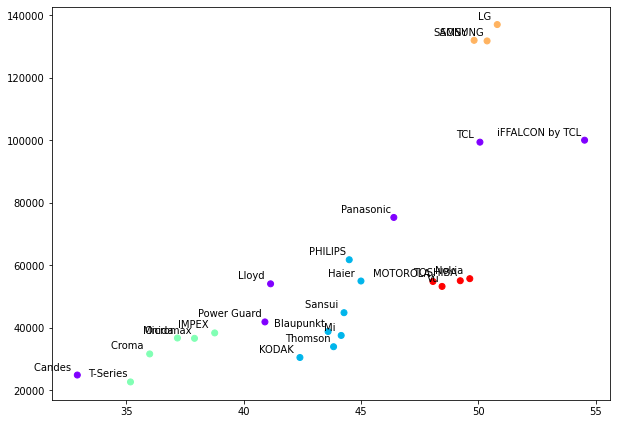

In [81]:
X = df_n[['Size', 'Original Price']].to_numpy()
clustering = DBSCAN(eps=0.1,min_samples=2).fit(X)
print(clustering.labels_)
plot_2d(df_brand[['Size', 'Original Price']].to_numpy(),clustering.labels_,df_brand.index)

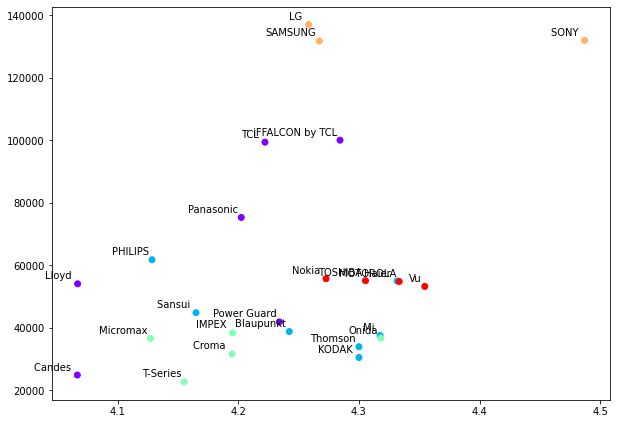

In [82]:
plot_2d(df_brand[['Rating', 'Original Price']].to_numpy(),clustering.labels_,df_brand.index)